In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
import pickle
from sklearn.model_selection import train_test_split

In [ ]:
model = keras.models.load_model('DenseNet121_Results_/Model_DenseNet121')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Batc  (None, 40, 1024)         4096      
 hNormalization)                                                 
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               270592    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 11)                715       
                                                                 
Total params: 275,403
Trainable params: 273,355
Non-trainable params: 2,048
_________________________________________________________________


In [ ]:
with open (r"D:\UCF11\'DenseNet121_Results\X_DenseNet121.p", 'rb') as fp:
  X = pickle.load(fp)
    
with open (r"D:\UCF11\DenseNet121_Results\Y_DenseNet121.p", 'rb') as fp:
  Y = pickle.load(fp)

In [ ]:
def pad_into_array(list, total_length):
  T = []
    
  for i in range(len(list)):
    pad = total_length - X[i].shape[0]
    if pad <= 0:
      T.append(list[i][:total_length, :])
    else:
      T.append(np.pad(list[i], [(0, pad), (0, 0)]))
  
  return np.array(T)

In [ ]:
max_length = 40
X = pad_into_array(X, max_length)

print(type(X))
print(X.shape)
print(type(Y))
print(Y.shape)

<class 'numpy.ndarray'>
(1600, 40, 1024)
<class 'numpy.ndarray'>
(1600, 11)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1280, 40, 1024)
(1280, 11)
(320, 40, 1024)
(320, 11)


In [ ]:
output = 'DenseNet121_Results/Confusion_Matrix_DenseNet121.png'

classes=['basketball', 'biking', 'diving', 'golf_swing', 'horse_riding', 'soccer_juggling', 'swing', 'tennis_swing', 'trampoline_jumping', 'volleyball_spiking', 'walking']

print(classes)

['basketball', 'biking', 'diving', 'golf_swing', 'horse_riding', 'soccer_juggling', 'swing', 'tennis_swing', 'trampoline_jumping', 'volleyball_spiking', 'walking']


In [ ]:
test_scores = model.evaluate(X_test, Y_test, verbose=0)

print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

predictions = model.predict(X_test)


Test loss: 0.03699725121259689
Test accuracy: 0.9937499761581421


In [ ]:
Y_pred = np.argmax(predictions, axis=1)

Y_true = np.argmax(Y_test, axis=1)

conf_matrix = tf.math.confusion_matrix(labels=Y_true, predictions=Y_pred).numpy()

In [ ]:
con_mat_norm = np.around(conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index = classes, columns = classes)

print(con_mat_df)

                    basketball  biking  diving  golf_swing  horse_riding  \
basketball                1.00     0.0     0.0         0.0           0.0   
biking                    0.00     1.0     0.0         0.0           0.0   
diving                    0.00     0.0     1.0         0.0           0.0   
golf_swing                0.00     0.0     0.0         1.0           0.0   
horse_riding              0.00     0.0     0.0         0.0           1.0   
soccer_juggling           0.03     0.0     0.0         0.0           0.0   
swing                     0.00     0.0     0.0         0.0           0.0   
tennis_swing              0.00     0.0     0.0         0.0           0.0   
trampoline_jumping        0.00     0.0     0.0         0.0           0.0   
volleyball_spiking        0.00     0.0     0.0         0.0           0.0   
walking                   0.00     0.0     0.0         0.0           0.0   

                    soccer_juggling  swing  tennis_swing  trampoline_jumping  \
basketb

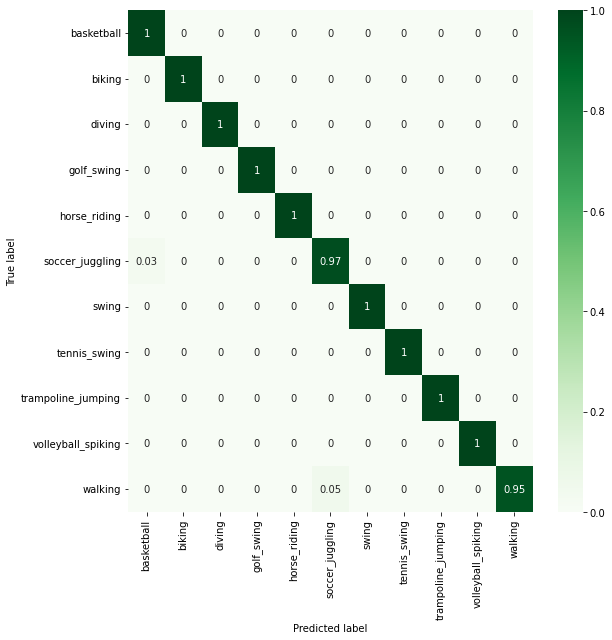

In [ ]:
figure = plt.figure(figsize=(9, 9))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Greens)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig(output, format="png", facecolor='white', transparent=False)